# GelMA only

In [274]:
import pandas as pd

In [275]:
from sklearn import preprocessing

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from scipy.stats import sem
import statistics

## Parameters and Data Import

In [277]:
pi = 3.141592653589793238

In [278]:
GelMA31 = pd.read_csv("GelMA31.csv")
GelMA31_H = 5.86
GelMA31_D = 18.61/1000
GelMA31_R = GelMA31_D/2

GelMA32 = pd.read_csv("GelMA32.csv")
GelMA32_H = 5.99
GelMA32_D = 17.83/1000
GelMA32_R = GelMA32_D/2

GelMA33 = pd.read_csv("GelMA33.csv")
GelMA33_H = 6.88
GelMA33_D = 18.01/1000
GelMA33_R = GelMA33_D/2

GelMA34 = pd.read_csv("GelMA34.csv")
GelMA34_H = 7.11
GelMA34_D = 18.39/1000
GelMA34_R = GelMA34_D/2

GelMA35 = pd.read_csv("GelMA35.csv")
GelMA35_H = 6.40
GelMA35_D = 18.38/1000
GelMA35_R = GelMA35_D/2


In [279]:
GelMA31.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA32.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA33.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA34.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA35.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

In [280]:
GelMA34

,Time [sec],Force [N],Stroke [mm]
0,0.00,0.000636,0.000000
1,0.01,0.000874,0.000000
2,0.02,0.001987,0.000033
3,0.03,0.002384,0.000067
4,0.04,0.002146,0.000133
...,...,...,...
25314,253.14,1.341502,4.219000
25315,253.15,1.341581,4.219133
25316,253.16,1.341740,4.219300
25317,253.17,1.342535,4.219400


## Stress and Strain Calculation

In [284]:
pi*GelMA31_R**2

0.0002720085952655813

In [294]:
GelMA31['Engineering Strain'] = GelMA31['Stroke [mm]']/ GelMA31_H 
GelMA31['Stress [Pa]'] = (GelMA31['Force [N]'])/(pi*(GelMA31_R**2))

GelMA32['Engineering Strain'] = GelMA32['Stroke [mm]']/ GelMA32_H 
GelMA32['Stress [Pa]'] = (GelMA32['Force [N]']/(pi*GelMA32_R**2))

GelMA33['Engineering Strain'] = GelMA33['Stroke [mm]']/ GelMA33_H 
GelMA33['Stress [Pa]'] = (GelMA33['Force [N]']/(pi*GelMA33_R**2))

GelMA34['Engineering Strain'] = GelMA34['Stroke [mm]']/ GelMA34_H 
GelMA34['Stress [Pa]'] = (GelMA34['Force [N]']/(pi*GelMA34_R**2))

GelMA35['Engineering Strain'] = GelMA35['Stroke [mm]']/ GelMA35_H 
GelMA35['Stress [Pa]'] = (GelMA35['Force [N]']/(pi*GelMA35_R**2))



GelMA31['Engineering Strain'] = GelMA31['Stroke [mm]']/ GelMA31_H 
GelMA31['Stress [kPa]'] = (GelMA31['Force [N]']/(pi*GelMA31_R**2))/1000

GelMA32['Engineering Strain'] = GelMA32['Stroke [mm]']/ GelMA32_H 
GelMA32['Stress [kPa]'] = (GelMA32['Force [N]']/(pi*GelMA32_R**2))/1000

GelMA33['Engineering Strain'] = GelMA33['Stroke [mm]']/ GelMA33_H 
GelMA33['Stress [kPa]'] = (GelMA33['Force [N]']/(pi*GelMA33_R**2))/1000

GelMA34['Engineering Strain'] = GelMA34['Stroke [mm]']/ GelMA34_H 
GelMA34['Stress [kPa]'] = (GelMA34['Force [N]']/(pi*GelMA34_R**2))/1000

GelMA35['Engineering Strain'] = GelMA35['Stroke [mm]']/ GelMA35_H 
GelMA35['Stress [kPa]'] = (GelMA35['Force [N]']/(pi*GelMA35_R**2))/1000

In [295]:
GelMA31['Stress [Pa]']

0          -7.012091
1          -3.506045
2          -1.753023
3          -2.045193
4          -2.629533
            ...     
24079    7450.635882
24080    7450.345450
24081    7449.176369
24082    7449.176369
24083    7449.176369
Name: Stress [Pa], Length: 24084, dtype: float64

## Cutting the Data 

In [288]:
GelMA31_cut = GelMA31[~(GelMA31['Force [N]']<= 0.1)]

GelMA32_cut = GelMA32[~(GelMA32['Force [N]']<= 0.1)]

GelMA33_cut = GelMA33[~(GelMA33['Force [N]']<= 0.1)]

GelMA34_cut = GelMA34[~(GelMA34['Force [N]']<= 0.1)]

GelMA35_cut = GelMA35[~(GelMA35['Force [N]']<= 0.1)]

In [289]:
GelMA31_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa]
3361,33.61,0.100295,0.560133,0.095586,368.718863,0.368719
3362,33.62,0.100692,0.560300,0.095614,370.179846,0.370180
3369,33.69,0.100374,0.561467,0.095813,369.011133,0.369011
3370,33.70,0.102520,0.561633,0.095842,376.899855,0.376900
3371,33.71,0.104189,0.561800,0.095870,383.035322,0.383035
...,...,...,...,...,...,...
24079,240.79,2.026637,4.013167,0.684841,7450.635882,7.450636
24080,240.80,2.026558,4.013333,0.684869,7450.345450,7.450345
24081,240.81,2.026240,4.013467,0.684892,7449.176369,7.449176
24082,240.82,2.026240,4.013600,0.684915,7449.176369,7.449176


In [290]:
GelMA31_cut['Strain Normalised'] = GelMA31_cut['Engineering Strain'] - GelMA31_cut.iloc[0]['Engineering Strain']

GelMA32_cut['Strain Normalised'] = GelMA32_cut['Engineering Strain'] - GelMA32_cut.iloc[0]['Engineering Strain']

GelMA33_cut['Strain Normalised'] = GelMA33_cut['Engineering Strain'] - GelMA33_cut.iloc[0]['Engineering Strain']

GelMA34_cut['Strain Normalised'] = GelMA34_cut['Engineering Strain'] - GelMA34_cut.iloc[0]['Engineering Strain']

GelMA35_cut['Strain Normalised'] = GelMA35_cut['Engineering Strain'] - GelMA35_cut.iloc[0]['Engineering Strain']

GelMA31_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/565696457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut['Strain Normalised'] = GelMA31_cut['Engineering Strain'] - GelMA31_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/565696457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA32_cut['Strain Normalised'] = GelMA32_cut['Engineering Strain'] - GelMA32_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr6

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised
3361,33.61,0.100295,0.560133,0.095586,368.718863,0.368719,0.000000
3362,33.62,0.100692,0.560300,0.095614,370.179846,0.370180,0.000028
3369,33.69,0.100374,0.561467,0.095813,369.011133,0.369011,0.000228
3370,33.70,0.102520,0.561633,0.095842,376.899855,0.376900,0.000256
3371,33.71,0.104189,0.561800,0.095870,383.035322,0.383035,0.000284
...,...,...,...,...,...,...,...
24079,240.79,2.026637,4.013167,0.684841,7450.635882,7.450636,0.589255
24080,240.80,2.026558,4.013333,0.684869,7450.345450,7.450345,0.589283
24081,240.81,2.026240,4.013467,0.684892,7449.176369,7.449176,0.589306
24082,240.82,2.026240,4.013600,0.684915,7449.176369,7.449176,0.589329


In [287]:
GelMA31_cut['Stroke Normalised'] = GelMA31_cut['Stroke [mm]'] - GelMA31_cut.iloc[0]['Stroke [mm]']

GelMA32_cut['Stroke Normalised'] = GelMA32_cut['Stroke [mm]'] - GelMA32_cut.iloc[0]['Stroke [mm]']

GelMA33_cut['Stroke Normalised'] = GelMA33_cut['Stroke [mm]'] - GelMA33_cut.iloc[0]['Stroke [mm]']

GelMA34_cut['Stroke Normalised'] = GelMA34_cut['Stroke [mm]'] - GelMA34_cut.iloc[0]['Stroke [mm]']

GelMA35_cut['Stroke Normalised'] = GelMA35_cut['Stroke [mm]'] - GelMA35_cut.iloc[0]['Stroke [mm]']


GelMA31_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/3285084310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut['Stroke Normalised'] = GelMA31_cut['Stroke [mm]'] - GelMA31_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/3285084310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA32_cut['Stroke Normalised'] = GelMA32_cut['Stroke [mm]'] - GelMA32_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [MPa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS,Force Cut Normalised
3361,33.61,0.100295,0.560133,0.095586,368.718863,0.000369,0.368719,0.000000,0.000000,0.100295,0.368719,0.000000
3362,33.62,0.100692,0.560300,0.095614,370.179846,0.000370,0.370180,0.000028,0.000167,0.100692,0.370180,0.000397
3369,33.69,0.100374,0.561467,0.095813,369.011133,0.000369,0.369011,0.000228,0.001333,0.100374,0.369011,0.000079
3370,33.70,0.102520,0.561633,0.095842,376.899855,0.000377,0.376900,0.000256,0.001500,0.102520,0.376900,0.002225
3371,33.71,0.104189,0.561800,0.095870,383.035322,0.000383,0.383035,0.000284,0.001667,0.104189,0.383035,0.003894
...,...,...,...,...,...,...,...,...,...,...,...,...
24079,240.79,2.026637,4.013167,0.684841,7450.635882,0.007451,7.450636,0.589255,3.453034,NaN,NaN,NaN
24080,240.80,2.026558,4.013333,0.684869,7450.345450,0.007450,7.450345,0.589283,3.453200,NaN,NaN,NaN
24081,240.81,2.026240,4.013467,0.684892,7449.176369,0.007449,7.449176,0.589306,3.453334,NaN,NaN,NaN
24082,240.82,2.026240,4.013600,0.684915,7449.176369,0.007449,7.449176,0.589329,3.453467,NaN,NaN,NaN


### Plotting Force and Stroke Normalised 

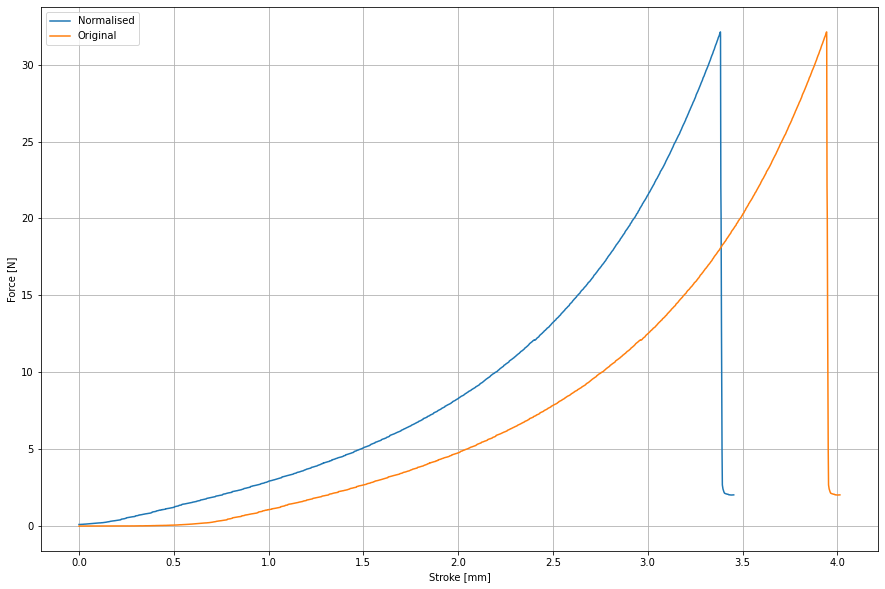

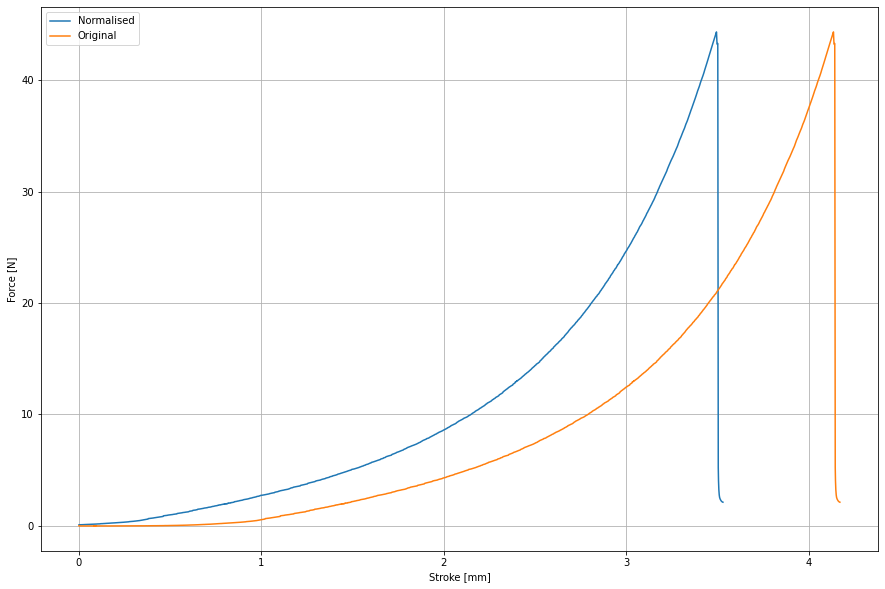

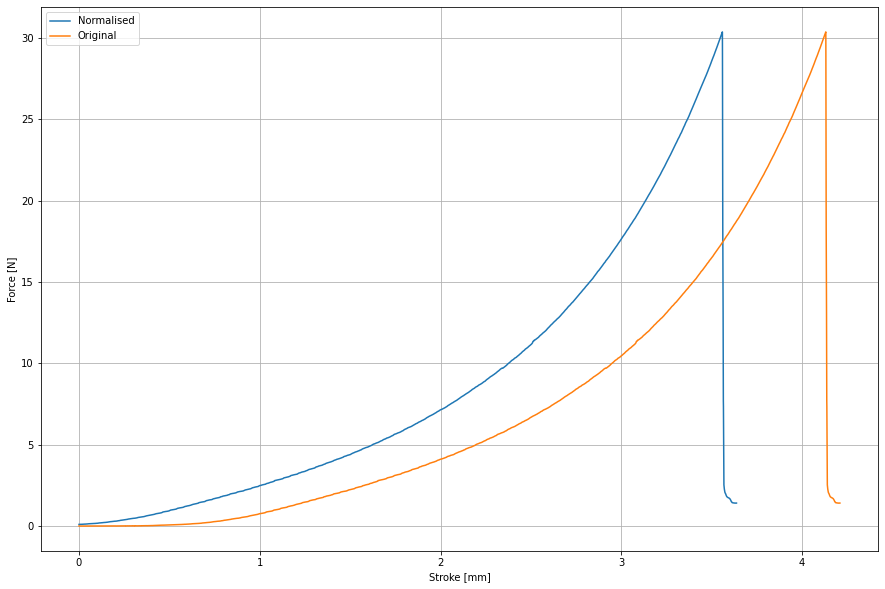

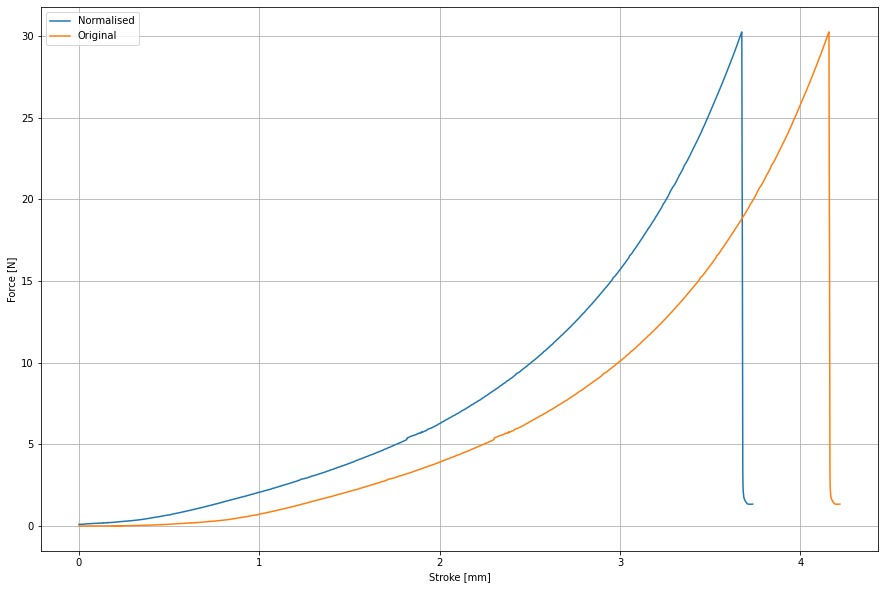

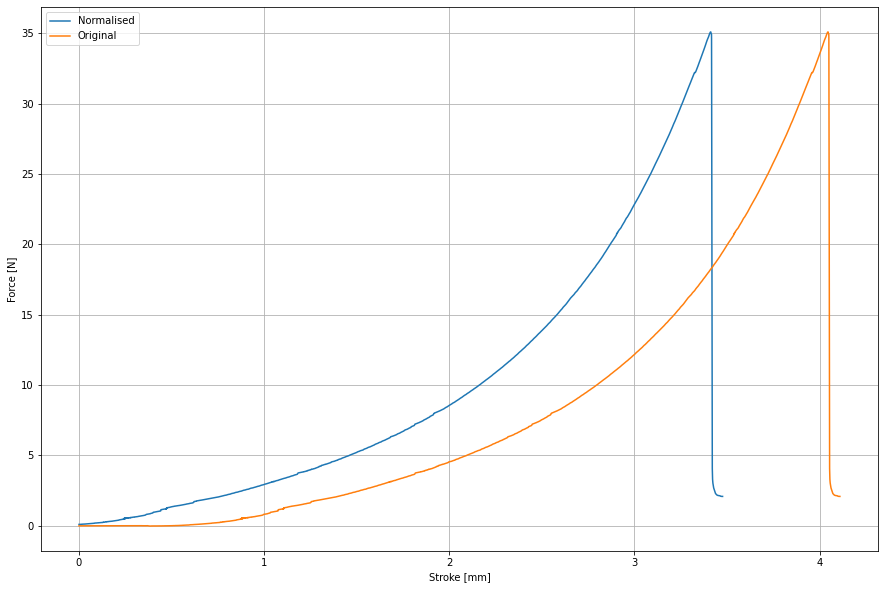

In [49]:
axA = GelMA31_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA31.plot(ax = axA, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()


axB = GelMA32_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA32.plot(ax = axB, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axC = GelMA33_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA33.plot(ax = axC, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axD = GelMA34_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA34.plot(ax = axD, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axE = GelMA35_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA35.plot(ax = axE, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()


### Plotting Stress and Strain Normalised 

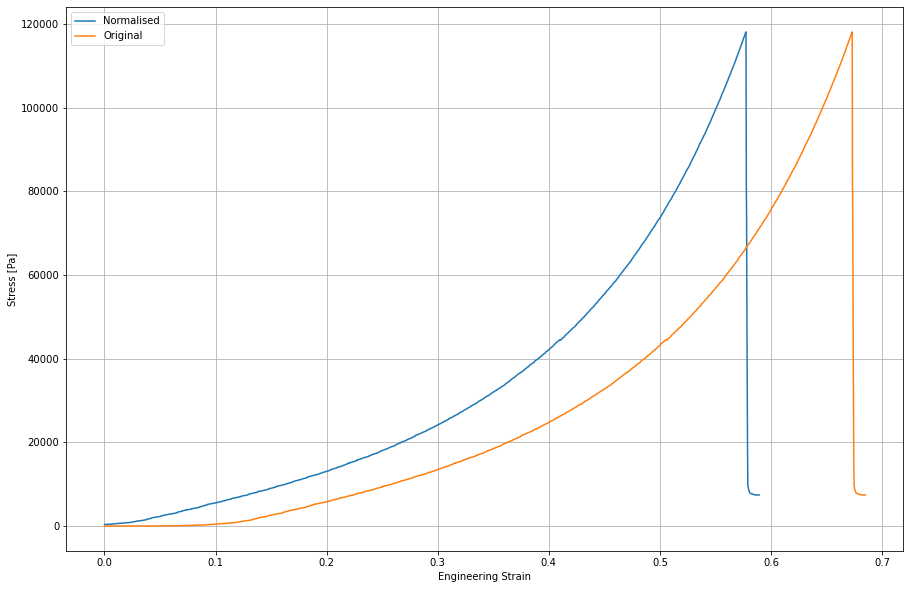

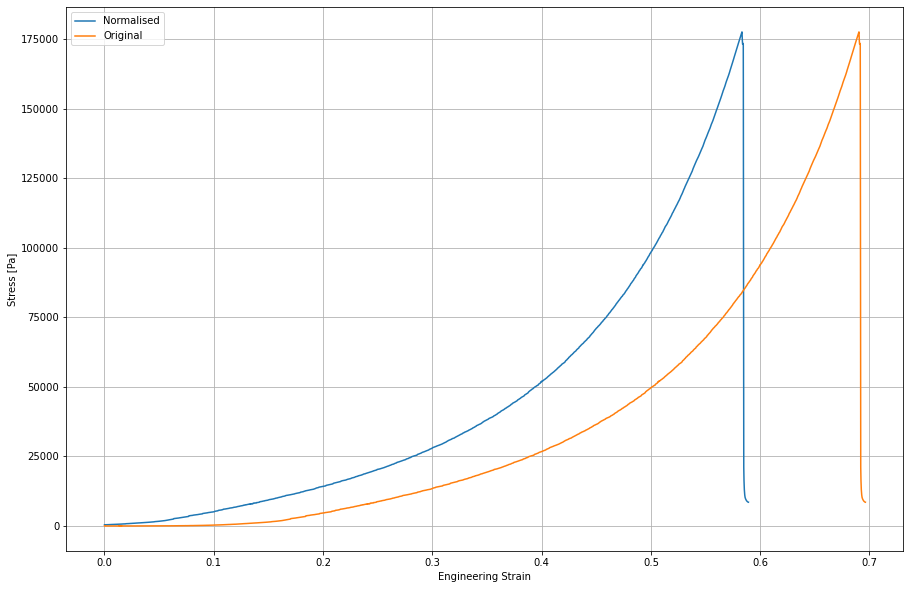

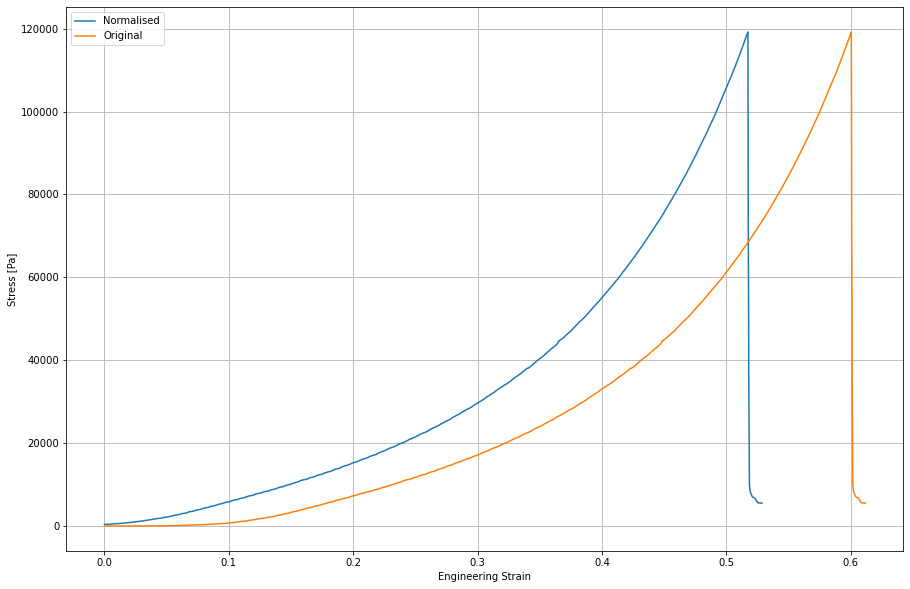

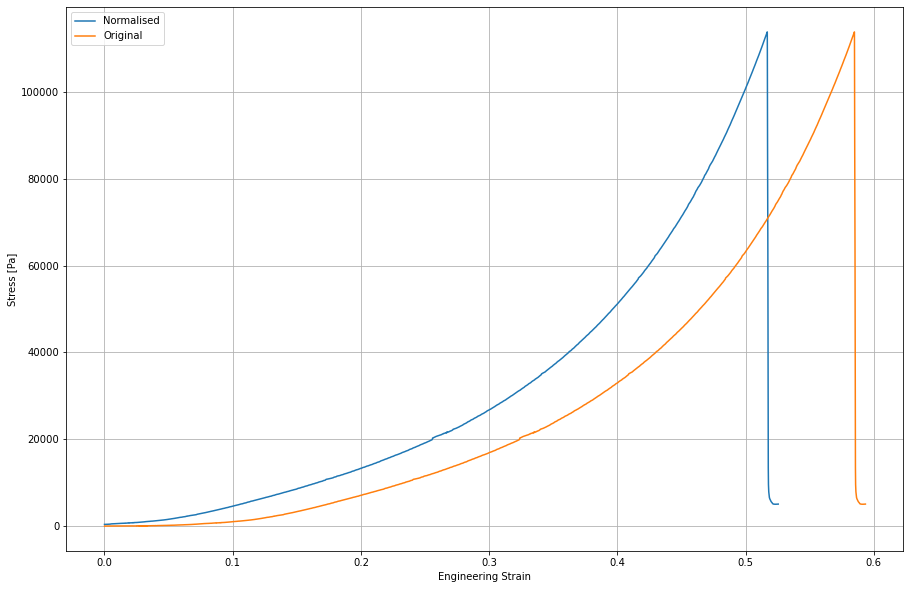

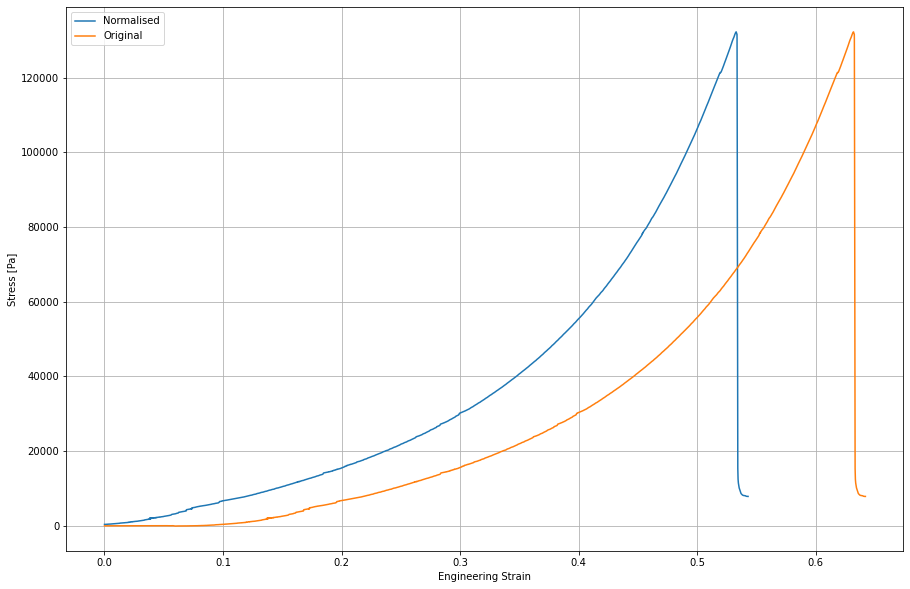

In [50]:
ax = GelMA31_cut.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA31.plot(ax = ax, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax1 = GelMA32_cut.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA32.plot(ax = ax1, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax2 = GelMA33_cut.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA33.plot(ax = ax2, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax3 = GelMA34_cut.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA34.plot(ax = ax3, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax4 = GelMA35_cut.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA35.plot(ax = ax4, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()


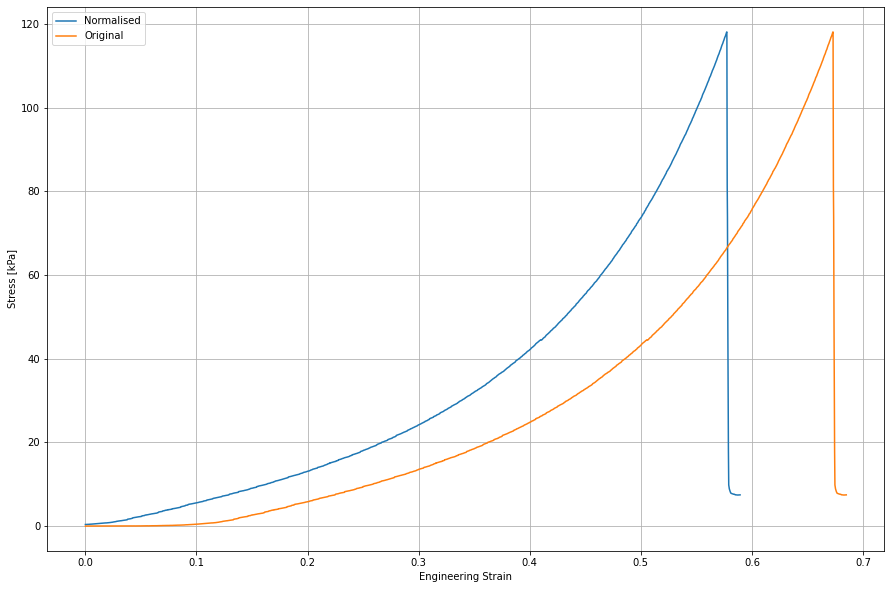

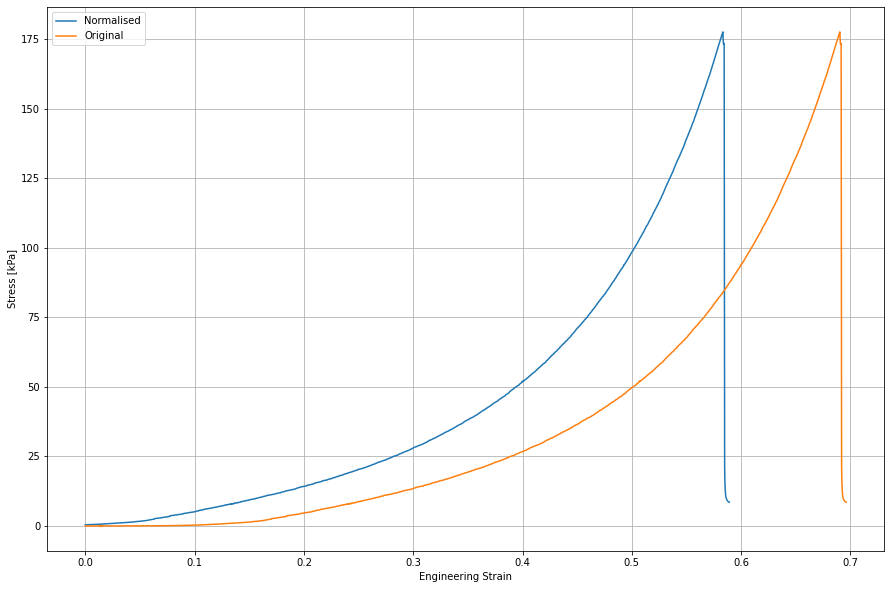

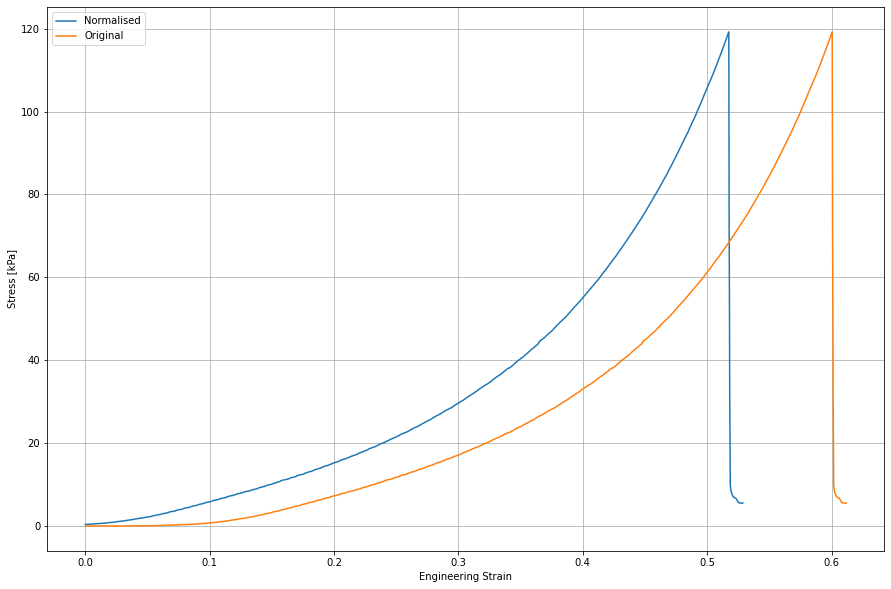

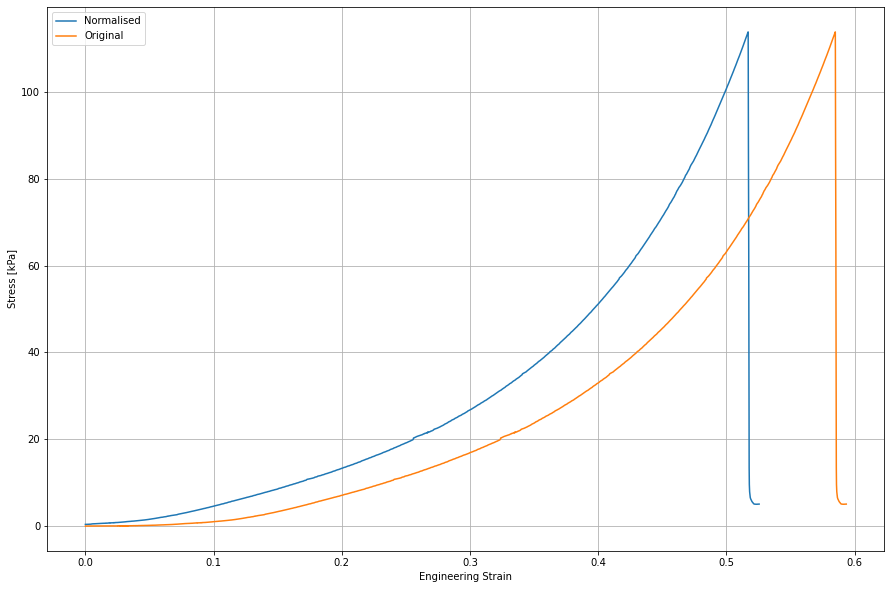

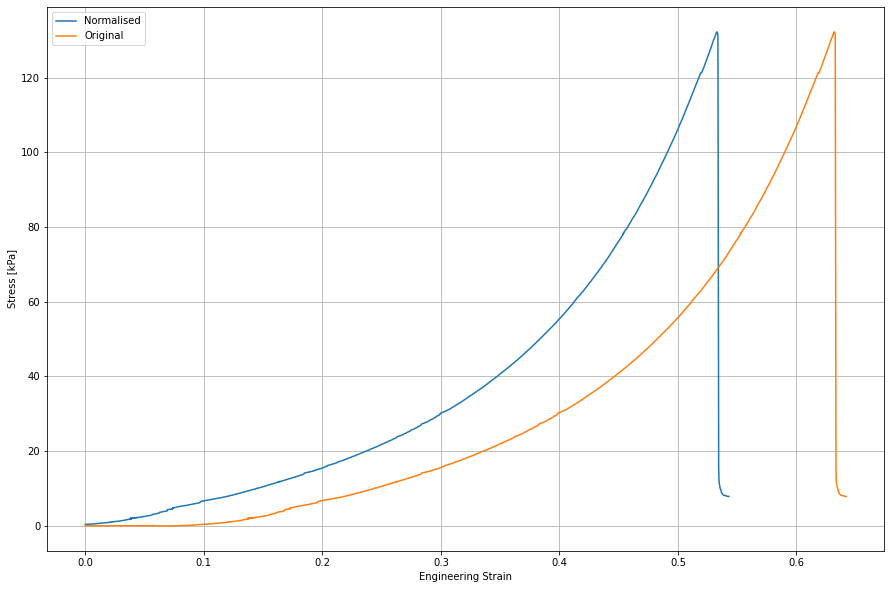

In [53]:
ax = GelMA31_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA31.plot(ax = ax, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax1 = GelMA32_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA32.plot(ax = ax1, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax2 = GelMA33_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA33.plot(ax = ax2, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax3 = GelMA34_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA34.plot(ax = ax3, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax4 = GelMA35_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA35.plot(ax = ax4, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()

## All Graphs of GelMA only (Normalised)_Non-max-cut 

### Force Stroke Plots (All)_Non-cut

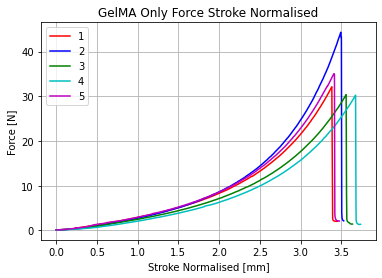

In [54]:
plt.plot(GelMA31_cut['Stroke Normalised'],GelMA31_cut['Force [N]'],color = 'r')
plt.plot(GelMA32_cut['Stroke Normalised'],GelMA32_cut['Force [N]'],color = 'b')
plt.plot(GelMA33_cut['Stroke Normalised'],GelMA33_cut['Force [N]'],color = 'g')
plt.plot(GelMA34_cut['Stroke Normalised'],GelMA34_cut['Force [N]'],color = 'c')
plt.plot(GelMA35_cut['Stroke Normalised'],GelMA35_cut['Force [N]'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA Only Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA only_FS_Non-max-cut.png")
plt.show()

### Stress Strain Plots (All)_Non-cut

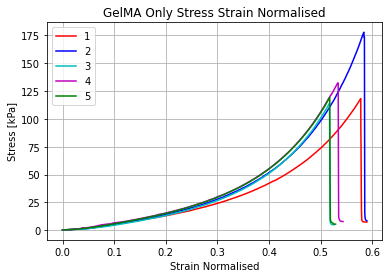

In [56]:
plt.plot(GelMA31_cut['Strain Normalised'],GelMA31_cut['Stress [kPa]'],color = 'r')
plt.plot(GelMA32_cut['Strain Normalised'],GelMA32_cut['Stress [kPa]'],color = 'b')
plt.plot(GelMA34_cut['Strain Normalised'],GelMA34_cut['Stress [kPa]'],color = 'c')
plt.plot(GelMA35_cut['Strain Normalised'],GelMA35_cut['Stress [kPa]'],color = 'm')
plt.plot(GelMA33_cut['Strain Normalised'],GelMA33_cut['Stress [kPa]'],color = 'g')
plt.grid()
plt.legend('12345')
plt.title('GelMA Only Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA only_SS_Non-max-cut.png")
plt.show()

#norm_GelMA_Only = {'GelMA31_norm':GelMA31_cut['Strain Normalised'],
#                   'GelMA32_norm':GelMA32_cut['Strain Normalised'],
#                   'GelMA33_norm':GelMA33_cut['Strain Normalised'],
#                   'GelM34_norm':GelMA34_cut['Strain Normalised'],
#                   'GelMA35_norm':GelMA35_cut['Strain Normalised']}

#df_only = pd.DataFrame(norm_GelMA_Only)

#print(df_only)

In [18]:
GelMA31_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Strain Normalised,Stroke Normalised
3361,33.61,0.100295,0.560133,0.095586,368.718863,0.000000,0.000000
3362,33.62,0.100692,0.560300,0.095614,370.179846,0.000028,0.000167
3369,33.69,0.100374,0.561467,0.095813,369.011133,0.000228,0.001333
3370,33.70,0.102520,0.561633,0.095842,376.899855,0.000256,0.001500
3371,33.71,0.104189,0.561800,0.095870,383.035322,0.000284,0.001667
...,...,...,...,...,...,...,...
24079,240.79,2.026637,4.013167,0.684841,7450.635882,0.589255,3.453034
24080,240.80,2.026558,4.013333,0.684869,7450.345450,0.589283,3.453200
24081,240.81,2.026240,4.013467,0.684892,7449.176369,0.589306,3.453334
24082,240.82,2.026240,4.013600,0.684915,7449.176369,0.589329,3.453467


## Max cutting

### GelMA31 Force and Stress [kPa]

In [230]:
#max_v31 = GelMA31_cut.max()
#print(max_v31)
#print(max_v31['Strain Normalised'])
 
#print("Max values of Force [N] and Stroke [mm]:")
#print(maxForceIndex31, ',', maxStrokeIndex31)

maxForceIndex31 = float(GelMA31_cut['Force [N]'].idxmax()) #position
maxStrokeIndex31 = float(GelMA31_cut['Stroke [mm]'].idxmax())

GelMA31_cut_max_FS = GelMA31_cut.loc[0:maxForceIndex31, 'Force [N]']

GelMA31_cut['Force Cut Max FS'] = GelMA31_cut_max_FS
GelMA31_cut

##Stress

maxStressIndex31 = float(GelMA31_cut['Stress [kPa]'].idxmax())
maxStrainIndex31 = float(GelMA31_cut['Strain Normalised'].idxmax())
 
GelMA31_cut_max_SS = GelMA31_cut.loc[0:maxStressIndex31, 'Stress [kPa]']

GelMA31_cut['Stress Cut Max SS'] = GelMA31_cut_max_SS

GelMA31_cut

#GelMA31_cut.drop('Stroke Normalised Max FS', axis=1, inplace=True)
#GelMA31_cut.drop('Strain Normalised Max SS', axis=1, inplace=True)

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/3281401222.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut['Force Cut Max FS'] = GelMA31_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/3281401222.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut['Stress Cut Max SS'] = GelMA31_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [MPa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS,Force Cut Normalised
3361,33.61,0.100295,0.560133,0.095586,368.718863,0.000369,0.368719,0.000000,0.000000,0.100295,0.368719,0.000000
3362,33.62,0.100692,0.560300,0.095614,370.179846,0.000370,0.370180,0.000028,0.000167,0.100692,0.370180,0.000397
3369,33.69,0.100374,0.561467,0.095813,369.011133,0.000369,0.369011,0.000228,0.001333,0.100374,0.369011,0.000079
3370,33.70,0.102520,0.561633,0.095842,376.899855,0.000377,0.376900,0.000256,0.001500,0.102520,0.376900,0.002225
3371,33.71,0.104189,0.561800,0.095870,383.035322,0.000383,0.383035,0.000284,0.001667,0.104189,0.383035,0.003894
...,...,...,...,...,...,...,...,...,...,...,...,...
24079,240.79,2.026637,4.013167,0.684841,7450.635882,0.007451,7.450636,0.589255,3.453034,NaN,NaN,NaN
24080,240.80,2.026558,4.013333,0.684869,7450.345450,0.007450,7.450345,0.589283,3.453200,NaN,NaN,NaN
24081,240.81,2.026240,4.013467,0.684892,7449.176369,0.007449,7.449176,0.589306,3.453334,NaN,NaN,NaN
24082,240.82,2.026240,4.013600,0.684915,7449.176369,0.007449,7.449176,0.589329,3.453467,NaN,NaN,NaN


In [231]:
#GelMA31_cut['Force Cut Normalised'] = GelMA31_cut['Force Cut Max FS'] - GelMA31_cut.iloc[0]['Force Cut Max FS']
#GelMA31_cut

### GelMA32 Force and Stress

In [232]:
maxForceIndex32 = float(GelMA32_cut['Force [N]'].idxmax()) #position
maxStrokeIndex32 = float(GelMA32_cut['Stroke [mm]'].idxmax())


GelMA32_cut_max_FS = GelMA32_cut.loc[0:maxForceIndex32, 'Force [N]']

GelMA32_cut['Force Cut Max FS'] = GelMA32_cut_max_FS
GelMA32_cut

##Stress

maxStressIndex32 = float(GelMA32_cut['Stress [kPa]'].idxmax())
maxStrainIndex32 = float(GelMA32_cut['Strain Normalised'].idxmax())
 
GelMA32_cut_max_SS = GelMA32_cut.loc[0:maxStressIndex32, 'Stress [kPa]']

GelMA32_cut['Stress Cut Max SS'] = GelMA32_cut_max_SS

GelMA32_cut


/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/1546787075.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA32_cut['Force Cut Max FS'] = GelMA32_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/1546787075.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA32_cut['Stress Cut Max SS'] = GelMA32_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [MPa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3847,38.47,0.100295,0.641167,0.107040,401.684817,0.000402,0.401685,0.000000,0.000000,0.100295,0.401685
3857,38.57,0.100136,0.642800,0.107312,401.048415,0.000401,0.401048,0.000273,0.001633,0.100136,0.401048
3860,38.60,0.100374,0.643333,0.107401,402.003218,0.000402,0.402003,0.000362,0.002167,0.100374,0.402003
3861,38.61,0.100772,0.643467,0.107423,403.594823,0.000404,0.403595,0.000384,0.002300,0.100772,0.403595
3862,38.62,0.100533,0.643633,0.107451,402.640020,0.000403,0.402640,0.000412,0.002467,0.100533,0.402640
...,...,...,...,...,...,...,...,...,...,...,...
25021,250.21,2.129157,4.170134,0.696183,8527.370229,0.008527,8.527370,0.589143,3.528967,NaN,NaN
25022,250.22,2.129157,4.170333,0.696216,8527.370229,0.008527,8.527370,0.589176,3.529166,NaN,NaN
25023,250.23,2.129157,4.170500,0.696244,8527.370229,0.008527,8.527370,0.589204,3.529333,NaN,NaN
25024,250.24,2.128760,4.170633,0.696266,8525.780226,0.008526,8.525780,0.589226,3.529466,NaN,NaN


### GelMA33 Force and Stress

In [233]:
maxForceIndex33 = float(GelMA33_cut['Force [N]'].idxmax()) #position
maxStrokeIndex33 = float(GelMA33_cut['Stroke [mm]'].idxmax())


GelMA33_cut_max_FS = GelMA33_cut.loc[0:maxForceIndex33, 'Force [N]']

GelMA33_cut['Force Cut Max FS'] = GelMA33_cut_max_FS
GelMA33_cut

##Stress

maxStressIndex33 = float(GelMA33_cut['Stress [kPa]'].idxmax())
maxStrainIndex33 = float(GelMA33_cut['Strain Normalised'].idxmax())
 
GelMA33_cut_max_SS = GelMA33_cut.loc[0:maxStressIndex33, 'Stress [kPa]']

GelMA33_cut['Stress Cut Max SS'] = GelMA33_cut_max_SS

GelMA33_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/1515975842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA33_cut['Force Cut Max FS'] = GelMA33_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/1515975842.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA33_cut['Stress Cut Max SS'] = GelMA33_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [MPa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3433,34.33,0.100374,0.572100,0.083154,394.007773,0.000394,0.394008,0.000000,0.000000,0.100374,0.394008
3434,34.34,0.100931,0.572300,0.083183,396.191467,0.000396,0.396191,0.000029,0.000200,0.100931,0.396191
3441,34.41,0.100533,0.573500,0.083358,394.631910,0.000395,0.394632,0.000203,0.001400,0.100533,0.394632
3442,34.42,0.101884,0.573667,0.083382,399.935110,0.000400,0.399935,0.000228,0.001567,0.101884,0.399935
3443,34.43,0.101487,0.573833,0.083406,398.375161,0.000398,0.398375,0.000252,0.001733,0.101487,0.398375
...,...,...,...,...,...,...,...,...,...,...,...
25253,252.53,1.413266,4.208833,0.611749,5547.618707,0.005548,5.547619,0.528595,3.636733,NaN,NaN
25254,252.54,1.413107,4.209033,0.611778,5546.994570,0.005547,5.546995,0.528624,3.636933,NaN,NaN
25255,252.55,1.413107,4.209167,0.611798,5546.994570,0.005547,5.546995,0.528643,3.637067,NaN,NaN
25256,252.56,1.412710,4.209300,0.611817,5545.436190,0.005545,5.545436,0.528663,3.637200,NaN,NaN


### GelMA34 Force and Stress

In [234]:
maxForceIndex34 = float(GelMA34_cut['Force [N]'].idxmax()) #position
maxStrokeIndex34 = float(GelMA34_cut['Stroke [mm]'].idxmax())


GelMA34_cut_max_FS = GelMA34_cut.loc[0:maxForceIndex34, 'Force [N]']

GelMA34_cut['Force Cut Max FS'] = GelMA34_cut_max_FS
GelMA34_cut

##Stress

maxStressIndex34 = float(GelMA34_cut['Stress [kPa]'].idxmax())
maxStrainIndex34 = float(GelMA34_cut['Strain Normalised'].idxmax())
 
GelMA34_cut_max_SS = GelMA34_cut.loc[0:maxStressIndex34, 'Stress [kPa]']

GelMA34_cut['Stress Cut Max SS'] = GelMA34_cut_max_SS

GelMA34_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/4015039839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA34_cut['Force Cut Max FS'] = GelMA34_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/4015039839.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA34_cut['Stress Cut Max SS'] = GelMA34_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [MPa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2900,29.00,0.100931,0.483300,0.067975,379.987303,0.000380,0.379987,0.000000,0.000000,0.100931,0.379987
2901,29.01,0.100772,0.483467,0.067998,379.389069,0.000379,0.379389,0.000023,0.000167,0.100772,0.379389
2908,29.08,0.100692,0.484667,0.068167,379.089765,0.000379,0.379090,0.000192,0.001367,0.100692,0.379090
2909,29.09,0.101169,0.484833,0.068190,380.885217,0.000381,0.380885,0.000216,0.001533,0.101169,0.380885
2910,29.10,0.101089,0.485000,0.068214,380.585912,0.000381,0.380586,0.000239,0.001700,0.101089,0.380586
...,...,...,...,...,...,...,...,...,...,...,...
25314,253.14,1.341502,4.219000,0.593390,5050.541972,0.005051,5.050542,0.525415,3.735700,NaN,NaN
25315,253.15,1.341581,4.219133,0.593408,5050.839395,0.005051,5.050839,0.525434,3.735833,NaN,NaN
25316,253.16,1.341740,4.219300,0.593432,5051.438004,0.005051,5.051438,0.525457,3.736000,NaN,NaN
25317,253.17,1.342535,4.219400,0.593446,5054.431053,0.005054,5.054431,0.525471,3.736100,NaN,NaN


### GelMA35 Force and Stress 

In [235]:
maxForceIndex35 = float(GelMA35_cut['Force [N]'].idxmax()) #position
maxStrokeIndex35 = float(GelMA35_cut['Stroke [mm]'].idxmax())

GelMA35_cut_max_FS = GelMA35_cut.loc[0:maxForceIndex35, 'Force [N]']

GelMA35_cut['Force Cut Max FS'] = GelMA35_cut_max_FS
GelMA35_cut

##Stress

maxStressIndex35 = float(GelMA35_cut['Stress [kPa]'].idxmax())
maxStrainIndex35 = float(GelMA35_cut['Strain Normalised'].idxmax())
 
GelMA35_cut_max_SS = GelMA35_cut.loc[0:maxStressIndex35, 'Stress [kPa]']

GelMA35_cut['Stress Cut Max SS'] = GelMA35_cut_max_SS

GelMA35_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/3677826189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA35_cut['Force Cut Max FS'] = GelMA35_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1102/3677826189.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA35_cut['Stress Cut Max SS'] = GelMA35_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [MPa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
3802,38.02,0.100295,0.633567,0.098995,378.004603,0.000378,0.378005,0.000000,0.000000,0.100295,0.378005
3805,38.05,0.100136,0.634133,0.099083,377.405718,0.000377,0.377406,0.000089,0.000567,0.100136,0.377406
3806,38.06,0.100772,0.634267,0.099104,379.802010,0.000380,0.379802,0.000109,0.000700,0.100772,0.379802
3807,38.07,0.101646,0.634433,0.099130,383.096816,0.000383,0.383097,0.000135,0.000867,0.101646,0.383097
3808,38.08,0.101646,0.634600,0.099156,383.096816,0.000383,0.383097,0.000161,0.001033,0.101646,0.383097
...,...,...,...,...,...,...,...,...,...,...,...
24654,246.54,2.090533,4.108967,0.642026,7879.091283,0.007879,7.879091,0.543031,3.475400,NaN,NaN
24655,246.55,2.090693,4.109133,0.642052,7879.694313,0.007880,7.879694,0.543057,3.475566,NaN,NaN
24656,246.56,2.089580,4.109267,0.642073,7875.499484,0.007875,7.875499,0.543078,3.475700,NaN,NaN
24657,246.57,2.088229,4.109367,0.642089,7870.407647,0.007870,7.870408,0.543094,3.475800,NaN,NaN


In [236]:
#data = [GelMA31_cut_max_FS, GelMA32_cut_max_FS, GelMA33_cut_max_FS, GelMA34_cut_max_FS, GelMA35_cut_max_FS]
#All_GelMA_Force = pd.DataFrame(data,columns=['31','32', '33', '34', '35'])

#print (All_GelMA_Force)

In [237]:
#All_GelMA_Force

In [238]:
#pd.core.frame.DataFrame(All_GelMA_Force)
#All_GelMA_Force.rename(columns={"Force":"Force [N]",
#                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
#          ,inplace=True)

## Plots of Max cutting 

### Force Stroke Plots (All)_Cut

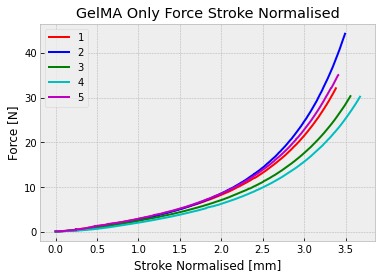

In [239]:
plt.plot(GelMA31_cut['Stroke Normalised'],GelMA31_cut['Force Cut Max FS'],color = 'r')
plt.plot(GelMA32_cut['Stroke Normalised'],GelMA32_cut['Force Cut Max FS'],color = 'b')
plt.plot(GelMA33_cut['Stroke Normalised'],GelMA33_cut['Force Cut Max FS'],color = 'g')
plt.plot(GelMA34_cut['Stroke Normalised'],GelMA34_cut['Force Cut Max FS'],color = 'c')
plt.plot(GelMA35_cut['Stroke Normalised'],GelMA35_cut['Force Cut Max FS'],color = 'm')
plt.grid(visible = True)
plt.legend('12345')
plt.title('GelMA Only Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA only_FS_Cut.png")
plt.show()

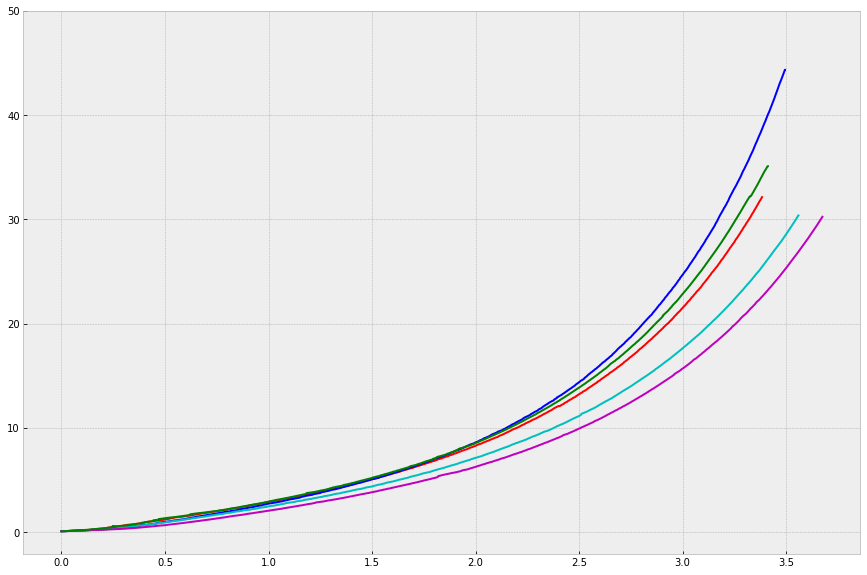

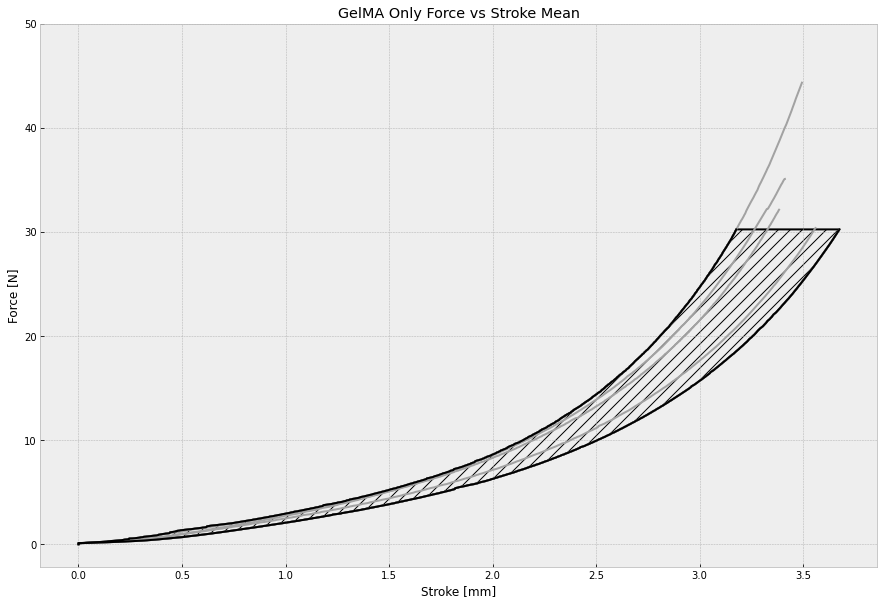

In [240]:
d1 = GelMA31_cut['Stroke Normalised']
d2 = GelMA32_cut['Stroke Normalised']
d3 = GelMA33_cut['Stroke Normalised']
d4 = GelMA34_cut['Stroke Normalised']
d5 = GelMA35_cut['Stroke Normalised']

y1 = GelMA31_cut['Force Cut Max FS']
y2 = GelMA32_cut['Force Cut Max FS']
y3 = GelMA33_cut['Force Cut Max FS']
y4 = GelMA34_cut['Force Cut Max FS']
y5 = GelMA35_cut['Force Cut Max FS']

y_common = np.linspace(0,70,30000)

x1 = np.interp(y_common,y1,d1)
x2 = np.interp(y_common,y2,d2)
x3 = np.interp(y_common,y3,d3)
x4 = np.interp(y_common,y4,d4)
x5 = np.interp(y_common,y5,d5)

x = np.stack((x1,x2,x3,x4,x5))

xmax = np.max(x,axis=0)
xmin = np.min(x,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d1,y1,'red')
plt.plot(d2,y2,'blue')
plt.plot(d3,y3,'c')
plt.plot(d4,y4,'m')
plt.plot(d5,y5,'green')

plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,55,10))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x1,y_common,'#A2A2A2')
plt.plot(x2,y_common,'#A2A2A2')
plt.plot(x3,y_common,'#A2A2A2')
plt.plot(x4,y_common,'#A2A2A2')
plt.plot(x5,y_common,'#A2A2A2')

plt.plot(xmax,y_common,'black')
plt.plot(xmin,y_common,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common, xmax, xmin, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

plt.xticks(np.arange(0,4,0.5))
plt.yticks(np.arange(0,55,10))

plt.title('GelMA Only Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA Only_FS_Cut_Mean.png")

plt.show()

GelMA_Only_FS = {'xmin':xmin,
                  'xmax':xmax,
                'y_common':y_common}

GelMA_Only_FS_M = pd.DataFrame(GelMA_Only_FS) 

GelMA_Only_FS_M

GelMA_Only_FS_M.to_csv('GelMA_Only_FS_M.csv')

### Stress Strain Plots (All)_Cut

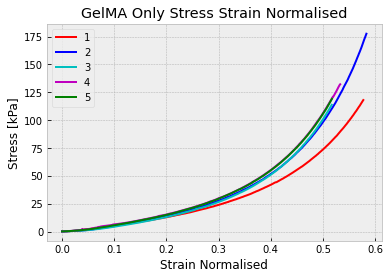

In [241]:
plt.plot(GelMA31_cut['Strain Normalised'],GelMA31_cut['Stress Cut Max SS'],color = 'r')
plt.plot(GelMA32_cut['Strain Normalised'],GelMA32_cut['Stress Cut Max SS'],color = 'b')
plt.plot(GelMA34_cut['Strain Normalised'],GelMA34_cut['Stress Cut Max SS'],color = 'c')
plt.plot(GelMA35_cut['Strain Normalised'],GelMA35_cut['Stress Cut Max SS'],color = 'm')
plt.plot(GelMA33_cut['Strain Normalised'],GelMA33_cut['Stress Cut Max SS'],color = 'g')
plt.grid(visible = True)
plt.legend('12345')
plt.title('GelMA Only Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA only_SS_Cut.png")
plt.show()

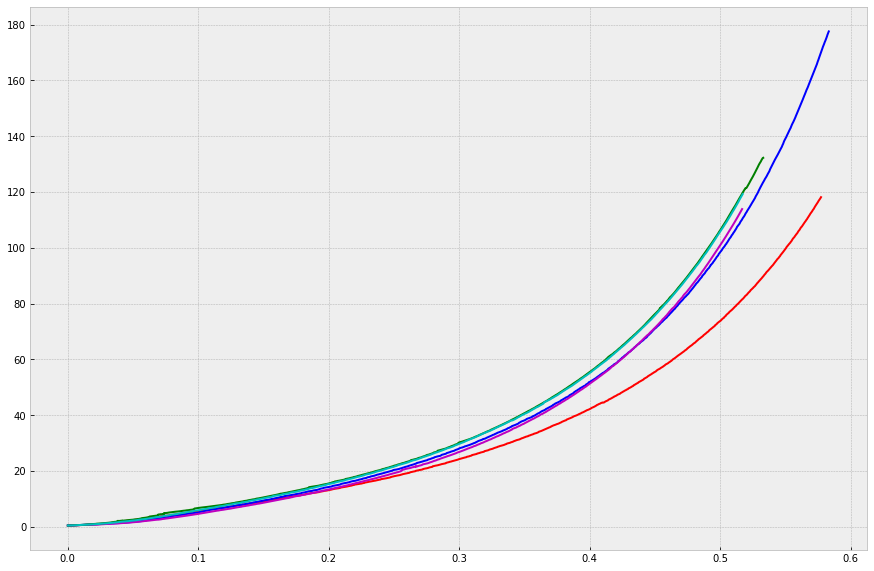

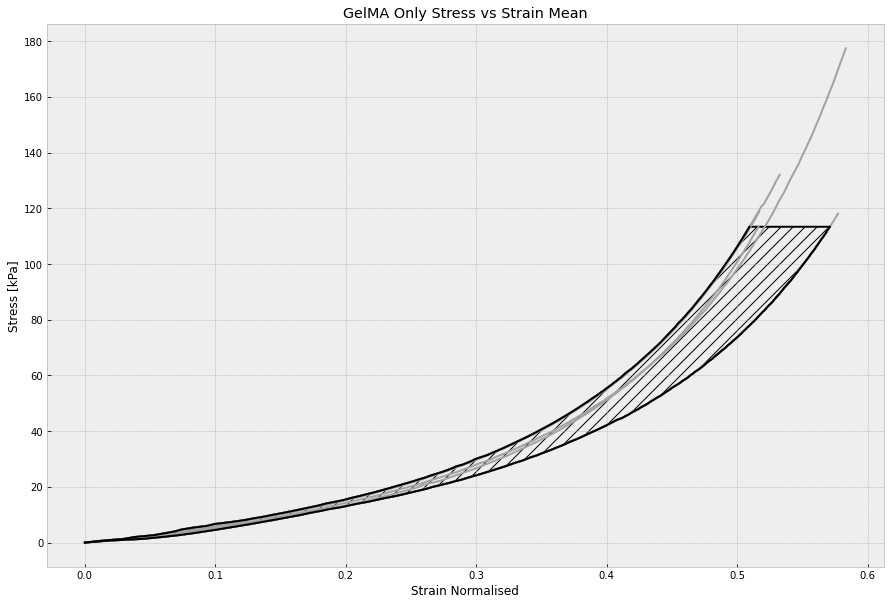

,xmin,xmax,y_common
0,0.000000,0.000000,0.000000
1,0.012777,0.016557,0.666889
2,0.029994,0.044165,1.333778
3,0.038221,0.058796,2.000667
4,0.053037,0.071908,2.667556
...,...,...,...
2995,NaN,NaN,1997.332444
2996,NaN,NaN,1997.999333
2997,NaN,NaN,1998.666222
2998,NaN,NaN,1999.333111


In [251]:
d6 = GelMA31_cut['Strain Normalised']
d7 = GelMA32_cut['Strain Normalised']
d8 = GelMA33_cut['Strain Normalised']
d9 = GelMA34_cut['Strain Normalised']
d10 = GelMA35_cut['Strain Normalised']

y6 = GelMA31_cut['Stress Cut Max SS']
y7 = GelMA32_cut['Stress Cut Max SS']
y8 = GelMA33_cut['Stress Cut Max SS']
y9 = GelMA34_cut['Stress Cut Max SS']
y10 = GelMA35_cut['Stress Cut Max SS']

#y_common_2 = np.linspace(0,2000000,30000) #Pa
y_common_2 = np.linspace(0,2000,3000) #kPa


x6 = np.interp(y_common_2,y6,d6)
x7 = np.interp(y_common_2,y7,d7)
x8 = np.interp(y_common_2,y8,d8)
x9 = np.interp(y_common_2,y9,d9)
x10 = np.interp(y_common_2,y10,d10)

x_2 = np.stack((x6,x7,x8,x9,x10))

xmax_2 = np.max(x_2,axis=0)
xmin_2 = np.min(x_2,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d6,y6,'red')
plt.plot(d7,y7,'blue')
plt.plot(d9,y9,'m')
plt.plot(d10,y10,'green')
plt.plot(d8,y8,'c')

#plt.xticks(np.arange(0,0.65,0.1))
#plt.yticks(np.arange(0,200000,20000))

plt.xticks(np.arange(0,0.65,0.1))
plt.yticks(np.arange(0,200,20))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x6,y_common_2,'#A2A2A2')
plt.plot(x7,y_common_2,'#A2A2A2')
plt.plot(x8,y_common_2,'#A2A2A2')
plt.plot(x9,y_common_2,'#A2A2A2')
plt.plot(x10,y_common_2,'#A2A2A2')

plt.plot(xmax_2,y_common_2,'black')
plt.plot(xmin_2,y_common_2,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common_2, xmax_2, xmin_2, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

#plt.xticks(np.arange(0,0.65,0.1))
#plt.yticks(np.arange(0,200000,20000))

plt.xticks(np.arange(0,0.65,0.1))
plt.yticks(np.arange(0,200,20))

plt.title('GelMA Only Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA Only_SS_Cut_Mean.png")

plt.show()

GelMA_Only_SS = {'xmin':xmin_2,
                  'xmax':xmax_2,
                'y_common':y_common_2}

GelMA_Only_SS_M = pd.DataFrame(GelMA_Only_SS) 

GelMA_Only_SS_M

#GelMA_Only_SS_M.to_csv('GelMA_Only_SS_M.csv') #[kPa]

## Mean of the samples 

### Force_stroke Mean 

In [252]:
GelMA31_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [MPa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS,Force Cut Normalised
3361,33.61,0.100295,0.560133,0.095586,368.718863,0.000369,0.368719,0.000000,0.000000,0.100295,0.368719,0.000000
3362,33.62,0.100692,0.560300,0.095614,370.179846,0.000370,0.370180,0.000028,0.000167,0.100692,0.370180,0.000397
3369,33.69,0.100374,0.561467,0.095813,369.011133,0.000369,0.369011,0.000228,0.001333,0.100374,0.369011,0.000079
3370,33.70,0.102520,0.561633,0.095842,376.899855,0.000377,0.376900,0.000256,0.001500,0.102520,0.376900,0.002225
3371,33.71,0.104189,0.561800,0.095870,383.035322,0.000383,0.383035,0.000284,0.001667,0.104189,0.383035,0.003894
...,...,...,...,...,...,...,...,...,...,...,...,...
24079,240.79,2.026637,4.013167,0.684841,7450.635882,0.007451,7.450636,0.589255,3.453034,NaN,NaN,NaN
24080,240.80,2.026558,4.013333,0.684869,7450.345450,0.007450,7.450345,0.589283,3.453200,NaN,NaN,NaN
24081,240.81,2.026240,4.013467,0.684892,7449.176369,0.007449,7.449176,0.589306,3.453334,NaN,NaN,NaN
24082,240.82,2.026240,4.013600,0.684915,7449.176369,0.007449,7.449176,0.589329,3.453467,NaN,NaN,NaN


In [253]:
#GelMA_Force1 = GelMA31_cut
#GelMA_Force1 = GelMA_Force.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force1

#GelMA_Force2 = GelMA32_cut
#GelMA_Force2 = GelMA_Force2.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force2

#GelMA_Force3 = GelMA33_cut
#GelMA_Force3 = GelMA_Force3.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force3

#GelMA_Force4 = GelMA34_cut
#GelMA_Force4 = GelMA_Force4.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force4

#GelMA_Force5 = GelMA34_cut
#GelMA_Force5 = GelMA_Force4.drop(['Time [sec]', 'Force [N]', 'Stroke [mm]', 'Engineering Strain', 'Stress [Pa]', 'Strain Normalised', 'Stroke Normalised', 'Stress Cut Max SS'], axis=1, inplace=True)
#GelMA_Force5

#GelMA_Force1['32'] = GelMA_Force2['Force Cut Max FS'] - GelMA_Force2.iloc[0]['Force Cut Max FS']
#GelMA_Force1


In [254]:
All_GelMA_force ={'GelMA31':GelMA31_cut['Force Cut Max FS'], 
                     'GelMA32':GelMA32_cut['Force Cut Max FS'], 
                     'GelMA33':GelMA33_cut['Force Cut Max FS'], 
                     'GelMA34':GelMA34_cut['Force Cut Max FS'],
                    'GelMA35':GelMA35_cut['Force Cut Max FS']}


All_GelMA_stroke = {'GelMA31':GelMA31_cut['Stroke Normalised'], 
                     'GelMA32':GelMA32_cut['Stroke Normalised'], 
                     'GelMA33':GelMA33_cut['Stroke Normalised'], 
                     'GelMA34':GelMA34_cut['Stroke Normalised'],
                    'GelMA35':GelMA35_cut['Stroke Normalised']}

All_GelMA_force
All_GelMA_stroke

df1_force = pd.DataFrame(All_GelMA_force)
df1_stroke = pd.DataFrame(All_GelMA_stroke)

#df1_force
#df1_stroke

#GelMA_force_mean = df1_force.mean(numeric_only = True, axis = 1)
#GelMA_stroke_mean = df1_stroke.mean(numeric_only = True, axis = 1)

#df1_force

#All_GelMA_force
#df1_force

#GelMA_force_mean


#maxForce = float(df1_force['GelMA_force_mean'].idxmax()) #position
#GelMA_FS_Mean = df1_force.loc[0:maxForce, 'GelMA_force_mean']
#GelMA_FS_Mean


#df1_force_1 = df1_force['GelMA_force_mean'].tolist([df1_force.index < 21899])
#df1_force_1


#df1_GelMA_Only_FS = {'GelMA Force Mean':GelMA_force_mean,
#                  'GelMA Stroke Mean':GelMA_stroke_mean}

#GelMA_Only_FS_M = pd.DataFrame(df1_GelMA_Only_FS) 

#GelMA_Only_FS_M

#GelMA_Only_FS_M.to_csv('GelMA_Only_FS_Mean.csv')

#numeric_only = true
#.tolist()
#[.index < #]





from numpy import array


#F = array([All_GelMA_force[k] for k in All_GelMA_force]).mean(axis = 0)

#Strk = array([All_GelMA_stroke[k] for k in All_GelMA_stroke]).mean(axis = 0)




from math import nan, isnan

#F_nan = [x for x in F if isnan(x) == False]
#F1 = pd.DataFrame(F_nan)

#FStd = array(pd.DataFrame(All_GelMA_force).std(numeric_only = True, axis = 1))
#F_nan_std = [x for x in FStd if isnan(x) == False]


#F1['Std'] = pd.DataFrame(F_nan_std)
#F1.columns = ['Mean', 'Std']

#F1['Mean'] = F1['Mean'] - F1.iloc[0]['Mean'] #Normalise Y (due to difference in starting points between samples)


#F1['Error1'] = F1['Mean'] - F1['Std']
#F1['Error2'] = F1['Mean'] + F1['Std']




#Strk_nan = [x for x in Strk if isnan(x) == False]
#Strk1 = pd.DataFrame(Strk_nan)

#StrkStd = array(pd.DataFrame(All_GelMA_stroke).std(numeric_only = True, axis = 1))
#Strk_nan_std = [x for x in StrkStd if isnan(x) == False]

#Strk1['Std'] = pd.DataFrame(Strk_nan_std)
#Strk1.columns = ['Mean', 'Std']

#Strk1['Error1'] = Strk1['Mean'] - Strk1['Std']
#Strk1['Error2'] = Strk1['Mean'] + Strk1['Std']



#Strk1['Mean'] = Strk1['Mean'] - Strk1.iloc[0]['Mean'] #to zero
#maxForcemean = float(F1['Mean'].idxmax()) #position; same shape as force

#Strk1['Mean'] = Strk1.loc[0:maxForcemean, 'Mean']
#Strk1['Std'] = Strk1.loc[0:maxForcemean, 'Std']
#Strk1['Error1'] = Strk1.loc[0:maxForcemean, 'Error1']
#Strk1['Error2'] = Strk1.loc[0:maxForcemean, 'Error2']

#Strk1 = Strk1[Strk1['Mean'].notnull()]
#Strk1

#F1

#F1.to_csv('F1_only.csv')
#Strk1.to_csv('Strk1_only.csv')

df1_force['s31'] = df1_stroke['GelMA31']
df1_force['s32'] = df1_stroke['GelMA32']
df1_force['s33'] = df1_stroke['GelMA33']
df1_force['s34'] = df1_stroke['GelMA34']
df1_force['s35'] = df1_stroke['GelMA35']

df1_force



,GelMA31,GelMA32,GelMA33,GelMA34,GelMA35,s31,s32,s33,s34,s35
2900,NaN,NaN,NaN,0.100931,NaN,NaN,NaN,NaN,0.000000,NaN
2901,NaN,NaN,NaN,0.100772,NaN,NaN,NaN,NaN,0.000167,NaN
2908,NaN,NaN,NaN,0.100692,NaN,NaN,NaN,NaN,0.001367,NaN
2909,NaN,NaN,NaN,0.101169,NaN,NaN,NaN,NaN,0.001533,NaN
2910,NaN,NaN,NaN,0.101089,NaN,NaN,NaN,NaN,0.001700,NaN
...,...,...,...,...,...,...,...,...,...,...
25314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.735700,NaN
25315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.735833,NaN
25316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.736000,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.736100,NaN


In [255]:
#Force (G31-G35)

G31 = [x for x in df1_force['GelMA31'] if isnan(x) == False]
G32 = [x for x in df1_force['GelMA32'] if isnan(x) == False]
G33 = [x for x in df1_force['GelMA33'] if isnan(x) == False]
G34 = [x for x in df1_force['GelMA34'] if isnan(x) == False]
G35 = [x for x in df1_force['GelMA35'] if isnan(x) == False]

#Stroke (G36-G40)
G36 = [x for x in df1_force['s31'] if isnan(x) == False]
G37 = [x for x in df1_force['s32'] if isnan(x) == False]
G38 = [x for x in df1_force['s33'] if isnan(x) == False]
G39 = [x for x in df1_force['s34'] if isnan(x) == False]
G40 = [x for x in df1_force['s35'] if isnan(x) == False]

dfG31 = pd.DataFrame(G31)
dfG32 = pd.DataFrame(G32)
dfG33 = pd.DataFrame(G33)
dfG34 = pd.DataFrame(G34)
dfG35 = pd.DataFrame(G35)

dfG36 = pd.DataFrame(G36)
dfG37 = pd.DataFrame(G37)
dfG38 = pd.DataFrame(G38)
dfG39 = pd.DataFrame(G39)
dfG40 = pd.DataFrame(G40)

dFONLY = dfG31
dFONLY['32'] = dfG32
dFONLY['33'] = dfG33
dFONLY['34'] = dfG34
dFONLY['35'] = dfG35

dFONLY['36'] = dfG36
dFONLY['37'] = dfG37
dFONLY['38'] = dfG38
dFONLY['39'] = dfG39
dFONLY['40'] = dfG40


dFONLY.columns = ['F31','F32','F33','F34','F35','S31','S32','S33','S34','S35']
dFONLY

df1 = dFONLY[['F31','F32','F33','F34','F35']]
ds1 = dFONLY[['S31','S32','S33','S34','S35']]

ds1

,S31,S32,S33,S34,S35
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000167,0.001633,0.000200,0.000167,0.000567
2,0.001333,0.002167,0.001400,0.001367,0.000700
3,0.001500,0.002300,0.001567,0.001533,0.000867
4,0.001667,0.002467,0.001733,0.001700,0.001033
...,...,...,...,...,...
20289,3.382800,3.384133,3.383567,3.383833,3.382067
20290,3.382967,3.384300,3.383767,3.384000,3.382233
20291,3.383134,3.384466,3.383900,3.384167,3.382400
20292,3.383300,3.384633,3.384067,3.384367,3.382566


In [256]:
F_dF = array([df1[k] for k in df1]).mean(axis = 0)
S_dF = array([ds1[k] for k in ds1]).mean(axis = 0)


F1 = pd.DataFrame(F_dF) #force
Strk1 = pd.DataFrame(S_dF) #stroke


FStd = array(pd.DataFrame(df1).std(numeric_only = True, axis = 1))
F_nan_std = [x for x in FStd if isnan(x) == False]

StrkStd = array(pd.DataFrame(ds1).std(numeric_only = True, axis = 1))
Strk_nan_std = [x for x in StrkStd if isnan(x) == False]


F1['Std'] = pd.DataFrame(F_nan_std)
F1.columns = ['Mean', 'Std']

Strk1['Std'] = pd.DataFrame(Strk_nan_std)
Strk1.columns = ['Mean', 'Std']



F1['Error1'] = F1['Mean'] - F1['Std']
F1['Error2'] = F1['Mean'] + F1['Std']


Strk1['Error1'] = Strk1['Mean'] - Strk1['Std']
Strk1['Error2'] = Strk1['Mean'] + Strk1['Std']


F1, Strk1



(            Mean       Std     Error1     Error2
 0       0.100438  0.000278   0.100160   0.100715
 1       0.100533  0.000373   0.100160   0.100906
 2       0.100549  0.000181   0.100368   0.100730
 3       0.101598  0.000671   0.100927   0.102269
 4       0.101789  0.001409   0.100380   0.103198
 ...          ...       ...        ...        ...
 20289  30.595064  6.534404  24.060660  37.129468
 20290  30.599738  6.535494  24.064244  37.135232
 20291  30.604220  6.536383  24.067837  37.140603
 20292  30.608670  6.537058  24.071612  37.145728
 20293  30.613010  6.538202  24.074808  37.151212
 
 [20294 rows x 4 columns],
            Mean       Std    Error1    Error2
 0      0.000000  0.000000  0.000000  0.000000
 1      0.000547  0.000630 -0.000084  0.001177
 2      0.001393  0.000520  0.000873  0.001914
 3      0.001553  0.000508  0.001045  0.002061
 4      0.001720  0.000508  0.001212  0.002228
 ...         ...       ...       ...       ...
 20289  3.383280  0.000839  3.382441  3.38

In [257]:
Strk1.shape, F1.shape

((20294, 4), (20294, 4))

In [258]:
GelMA34_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [MPa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2900,29.00,0.100931,0.483300,0.067975,379.987303,0.000380,0.379987,0.000000,0.000000,0.100931,0.379987
2901,29.01,0.100772,0.483467,0.067998,379.389069,0.000379,0.379389,0.000023,0.000167,0.100772,0.379389
2908,29.08,0.100692,0.484667,0.068167,379.089765,0.000379,0.379090,0.000192,0.001367,0.100692,0.379090
2909,29.09,0.101169,0.484833,0.068190,380.885217,0.000381,0.380885,0.000216,0.001533,0.101169,0.380885
2910,29.10,0.101089,0.485000,0.068214,380.585912,0.000381,0.380586,0.000239,0.001700,0.101089,0.380586
...,...,...,...,...,...,...,...,...,...,...,...
25314,253.14,1.341502,4.219000,0.593390,5050.541972,0.005051,5.050542,0.525415,3.735700,NaN,NaN
25315,253.15,1.341581,4.219133,0.593408,5050.839395,0.005051,5.050839,0.525434,3.735833,NaN,NaN
25316,253.16,1.341740,4.219300,0.593432,5051.438004,0.005051,5.051438,0.525457,3.736000,NaN,NaN
25317,253.17,1.342535,4.219400,0.593446,5054.431053,0.005054,5.054431,0.525471,3.736100,NaN,NaN


### Stress_Strain Mean 

In [259]:
All_GelMA_stress = {'GelMA31':GelMA31_cut['Stress Cut Max SS'], 
                     'GelMA32':GelMA32_cut['Stress Cut Max SS'], 
                     'GelMA33':GelMA33_cut['Stress Cut Max SS'], 
                     'GelMA34':GelMA34_cut['Stress Cut Max SS'],
                    'GelMA35':GelMA35_cut['Stress Cut Max SS']}

All_GelMA_strain = {'GelMA31':GelMA31_cut['Strain Normalised'], 
                     'GelMA32':GelMA32_cut['Strain Normalised'], 
                     'GelMA33':GelMA33_cut['Strain Normalised'], 
                     'GelMA34':GelMA34_cut['Strain Normalised'],
                    'GelMA35':GelMA35_cut['Strain Normalised']}

All_GelMA_stress
All_GelMA_strain

df1_stress = pd.DataFrame(All_GelMA_stress)
df1_strain = pd.DataFrame(All_GelMA_strain)

#df1_stress
#df1_strain

#GelMA_stress_mean = df1_stress.mean(axis = 1)
#GelMA_strain_mean = df1_strain.mean(axis = 1)

#GelMA_stress_mean

#df1_GelMA_Only_SS = {'GelMA Force Mean':GelMA_stress_mean,
#                  'GelMA Stroke Mean':GelMA_strain_mean}

#GelMA_Only_SS_M = pd.DataFrame(df1_GelMA_Only_SS) 

#GelMA_Only_SS_M

#GelMA_Only_SS_M.to_csv('GelMA_Only_SS_Mean.csv')

#S = array([All_GelMA_stress[k] for k in All_GelMA_stress]).mean(axis = 0)

#Strn = array([All_GelMA_strain[k] for k in All_GelMA_strain]).mean()


from math import nan, isnan

#S_nan = [x for x in S if isnan(x) == False]

#S1 = pd.DataFrame(S_nan)

#SStd = array(pd.DataFrame(All_GelMA_stress).std(numeric_only = True, axis = 1))
#S_nan_std = [x for x in SStd if isnan(x) == False]


#S1['Std'] = pd.DataFrame(S_nan_std)
#S1.columns = ['Mean', 'Std']

#S1['Mean'] = S1['Mean'] - S1.iloc[0]['Mean']


#S1['Error1'] = S1['Mean'] - S1['Std']
#S1['Error2'] = S1['Mean'] + S1['Std']


#Strain_nan = [x for x in Strn if isnan(x) == False]
#Strn1 = pd.DataFrame(Strain_nan)

#StrnStd = array(pd.DataFrame(All_GelMA_strain).std(numeric_only = True, axis = 1))
#Strn_nan_std = [x for x in StrnStd if isnan(x) == False]

#Strn1['Std'] = pd.DataFrame(Strn_nan_std)
#Strn1.columns = ['Mean', 'Std']

#Strn1['Error1'] = Strn1['Mean'] - Strn1['Std']
#Strn1['Error2'] = Strn1['Mean'] + Strn1['Std']



#Strn1['Mean'] = Strn1['Mean'] - Strn1.iloc[0]['Mean'] #to zero
#maxStressmean = float(S1['Mean'].idxmax()) #position; same shape as force

#Strn1['Mean'] = Strn1.loc[0:maxStressmean, 'Mean']
#Strn1['Std'] = Strn1.loc[0:maxStressmean, 'Std']
#Strn1['Error1'] = Strn1.loc[0:maxStressmean, 'Error1']
#Strn1['Error2'] = Strn1.loc[0:maxStressmean, 'Error2']

#Strn1 = Strn1[Strn1['Mean'].notnull()]
#Strn1

#S1

#Strn1

df1_stress['sn31'] = df1_strain['GelMA31']
df1_stress['sn32'] = df1_strain['GelMA32']
df1_stress['sn33'] = df1_strain['GelMA33']
df1_stress['sn34'] = df1_strain['GelMA34']
df1_stress['sn35'] = df1_strain['GelMA35']

df1_stress

,GelMA31,GelMA32,GelMA33,GelMA34,GelMA35,sn31,sn32,sn33,sn34,sn35
2900,NaN,NaN,NaN,0.379987,NaN,NaN,NaN,NaN,0.000000,NaN
2901,NaN,NaN,NaN,0.379389,NaN,NaN,NaN,NaN,0.000023,NaN
2908,NaN,NaN,NaN,0.379090,NaN,NaN,NaN,NaN,0.000192,NaN
2909,NaN,NaN,NaN,0.380885,NaN,NaN,NaN,NaN,0.000216,NaN
2910,NaN,NaN,NaN,0.380586,NaN,NaN,NaN,NaN,0.000239,NaN
...,...,...,...,...,...,...,...,...,...,...
25314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525415,NaN
25315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525434,NaN
25316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525457,NaN
25317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525471,NaN


In [260]:
#Stress

G31ss = [x for x in df1_stress['GelMA31'] if isnan(x) == False]
G32ss = [x for x in df1_stress['GelMA32'] if isnan(x) == False]
G33ss = [x for x in df1_stress['GelMA33'] if isnan(x) == False]
G34ss = [x for x in df1_stress['GelMA34'] if isnan(x) == False]
G35ss = [x for x in df1_stress['GelMA35'] if isnan(x) == False]

#Strain

G36ss = [x for x in df1_stress['sn31'] if isnan(x) == False]
G37ss = [x for x in df1_stress['sn32'] if isnan(x) == False]
G38ss = [x for x in df1_stress['sn33'] if isnan(x) == False]
G39ss = [x for x in df1_stress['sn34'] if isnan(x) == False]
G40ss = [x for x in df1_stress['sn35'] if isnan(x) == False]

dfG31ss = pd.DataFrame(G31ss)
dfG32ss = pd.DataFrame(G32ss)
dfG33ss = pd.DataFrame(G33ss)
dfG34ss = pd.DataFrame(G34ss)
dfG35ss = pd.DataFrame(G35ss)

dfG36ss = pd.DataFrame(G36ss)
dfG37ss = pd.DataFrame(G37ss)
dfG38ss = pd.DataFrame(G38ss)
dfG39ss = pd.DataFrame(G39ss)
dfG40ss = pd.DataFrame(G40ss)




dFONLYss = dfG31ss
dFONLYss['32'] = dfG32ss
dFONLYss['33'] = dfG33ss
dFONLYss['34'] = dfG34ss
dFONLYss['35'] = dfG35ss

dFONLYss['36'] = dfG36ss
dFONLYss['37'] = dfG37ss
dFONLYss['38'] = dfG38ss
dFONLYss['39'] = dfG39ss
dFONLYss['40'] = dfG40ss


dFONLYss.columns = ['Ss31','Ss32','Ss33','Ss34','Ss35','Sn31','Sn32','Sn33','Sn34','Sn35']
dFONLYss

dss1 = dFONLYss[['Ss31','Ss32','Ss33','Ss34','Ss35']]
dsn1 = dFONLYss[['Sn31','Sn32','Sn33','Sn34','Sn35']]

dsn1

,Sn31,Sn32,Sn33,Sn34,Sn35
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000028,0.000273,0.000029,0.000023,0.000089
2,0.000228,0.000362,0.000203,0.000192,0.000109
3,0.000256,0.000384,0.000228,0.000216,0.000135
4,0.000284,0.000412,0.000252,0.000239,0.000161
...,...,...,...,...,...
20289,0.577270,0.564964,0.491798,0.475926,0.528448
20290,0.577298,0.564992,0.491827,0.475949,0.528474
20291,0.577327,0.565019,0.491846,0.475973,0.528500
20292,0.577355,0.565047,0.491870,0.476001,0.528526


In [266]:
S_dF = array([dss1[k] for k in dss1]).mean(axis = 0)
Strn_dF = array([dsn1[k] for k in dsn1]).mean(axis = 0)


S1 = pd.DataFrame(S_dF) #stress
Strn1 = pd.DataFrame(Strn_dF) #strain

SStd = array(pd.DataFrame(dss1).std(numeric_only = True, axis = 1))
S_nan_std = [x for x in SStd if isnan(x) == False]

StrnStd = array(pd.DataFrame(dsn1).std(numeric_only = True, axis = 1))
Strn_nan_std = [x for x in StrnStd if isnan(x) == False]


S1['Std'] = pd.DataFrame(S_nan_std)
S1.columns = ['Mean', 'Std']

Strn1['Std'] = pd.DataFrame(Strn_nan_std)
Strn1.columns = ['Mean', 'Std']



S1['Error1'] = S1['Mean'] - S1['Std']
S1['Error2'] = S1['Mean'] + S1['Std']


Strn1['Error1'] = Strn1['Mean'] - Strn1['Std']
Strn1['Error2'] = Strn1['Mean'] + Strn1['Std']

S1


,Mean,Std,Error1,Error2
0,0.384481,0.013203,0.371277,0.397684
1,0.384843,0.013148,0.371695,0.397991
2,0.384908,0.013223,0.371684,0.398131
3,0.388882,0.012038,0.376845,0.400920
4,0.389547,0.010169,0.379377,0.399716
...,...,...,...,...
20289,117.321769,26.878732,90.443037,144.200502
20290,117.339753,26.883504,90.456249,144.223257
20291,117.357015,26.887559,90.469456,144.244573
20292,117.374157,26.890884,90.483273,144.265041


In [268]:
#F1.to_csv('F1_only.csv')
#Strk1.to_csv('Strk1_only.csv')
#S1.to_csv('S1_only.csv')
#Strn1.to_csv('Strn1_only.csv')

## Plotting the stress and force means

### Force_Stroke Mean plotting

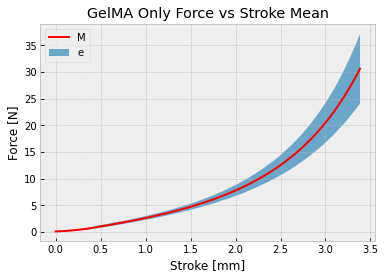

In [262]:
#plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
plt.plot(Strk1['Mean'], F1['Mean'], color= 'r')
#plt.plot(GelMA_stroke_mean, F, color= 'r')
plt.fill_between(Strk1['Mean'], F1['Error1'], F1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Me', loc = 'upper left')
plt.title('GelMA Only Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA only_FS Mean.png")
plt.show()

### Stress_Strain Mean plotting 

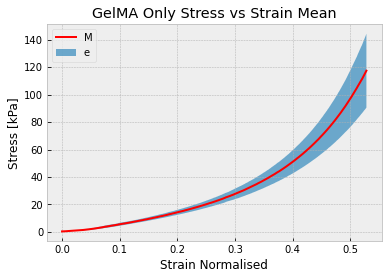

In [263]:
#plt.plot(GelMA_strain_mean, GelMA_stress_mean,color = 'k')
plt.plot(Strn1['Mean'], S1['Mean'], color= 'r')
plt.fill_between(Strn1['Mean'], S1['Error1'], S1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Me', loc = 'upper left')
plt.title('GelMA Only Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA only_SS Mean.png")
plt.show()

# Margin of Error

## Force_Stroke Margin Error

In [ ]:
def error_margin_fs (mean):
    a = 0.001/mean #1mm = 0.001m
    return (1 +- a)*mean

In [ ]:
GelMA_Only_Error_FS = error_margin_fs(Strk1['Mean'])

In [ ]:
df1_GelMA_Only_Er = {'GelMA Force Mean':GelMA_force_mean,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_Only_Error_FS}


dfF_GelMA_Only_Er = {'GelMA Force Mean':F,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_Only_Error_FS}

GelMA_Only_Er = pd.DataFrame(df1_GelMA_Only_Er) 

GelMA_Only_Er

GelMA_Only_Er.to_csv('GelMA_Only_Error_FS.csv')

In [ ]:
plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
#plt.errorbar(GelMA_stroke_mean, GelMA_force_mean, yerr = GelMA_Only_Error_FS, fmt = ' ')
plt.errorbar(Strk1['Mean'], F1['Mean'], yerr = GelMA_Only_Error_FS, fmt = ' ', color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA Only Force vs Stroke Mean & Error Margin')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
plt.savefig("GelMA only_FS Mean_Error.png")
plt.show()


#plt.fill_between(strain, error1, error1, alpha = 0.2)

## Stress_Strain Margin Error

In [ ]:
#import numpy as np
#import scipy.stats


#def mean_confidence_interval(data, confidence=0.95):
#    a = 1.0 * np.array(data)
#    n = len(a)
#    m, se = np.mean(a), scipy.stats.sem(a)
#    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#    return m, m-h, m+h

In [ ]:
#import scipy.stats as stats
#from scipy.stats import sem

#z_critical = stats.norm.ppf(q = 0.95)  
#sample_size=len(S)

# path        [File location variable]
#Code starts here
#data = pd.DataFrame(S)
#sample_std = np.std(data, ddof=1) / np.sqrt(np.size(data))
#data_sample = data.sample(n=2000, random_state=0)
#sample_mean = data_sample['installment'].mean
#sample_std = sem(S)
#a = sample_size ** 0.5
#margin_of_error = z_critical * (sample_std/44.721)
#confidence_interval = (S + margin_of_error, S - margin_of_error)

In [ ]:
#def z_error_mean (C, std, n):
#    er = (std / n**.5)*stats.norm.ppf(C+(1-C)/2,0,1)
#    return print("The margin of error is", er)

In [ ]:
#margin_of_error = z_error_mean(0.9, sample_std, sample_size)

In [ ]:
#Stress = mean_confidence_interval(S)
#Stress

In [ ]:
GelMA_D_Mean
GelMA_A_Mean

b= 0.001/GelMA_D_Mean

def error_margin_ss (force):
    from scipy import stats
    a = force/((1+2*b)*GelMA_A_Mean)
    c = force/((1-2*b)*GelMA_A_Mean)
    return (a,c)

In [ ]:
error_margin_ss(F)

In [ ]:
plt.errorbar(GelMA_strain_mean, S, yerr = error_margin_ss(F), fmt = ' ', color = '#A2A2A2', alpha = 0.5)
plt.plot(GelMA_strain_mean, S,color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA Only Stress vs Strain Mean & Error Margin')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA only_SS Mean_Error.png")
plt.show()